In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [5]:
# Read data
bc = pd.read_csv('breast_cancer.csv')

In [56]:
# Drop the 'samples' column
bc = bc.drop('samples', axis=1)

# Change type to integers so it's easier to process as integers

bc.loc[bc['type'] == 'basal', 'type'] = 1
bc.loc[bc['type'] == 'HER', 'type'] = 2
bc.loc[bc['type'] == 'cell_line', 'type'] = 3
bc.loc[bc['type'] == 'normal', 'type'] = 4
bc.loc[bc['type'] == 'luminal_A', 'type'] = 5
bc.loc[bc['type'] == 'luminal_B', 'type'] = 6
bc['type'] = bc['type'].astype(int)

KeyError: "['samples'] not found in axis"

In [57]:
bc

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,1,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,1,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,1,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,1,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,6,10.392638,7.334408,6.848586,7.020486,3.228065,7.815439,5.448470,4.496955,8.015534,...,12.638556,12.122129,14.331152,14.133976,8.495888,4.971727,6.209136,2.852852,3.697448,3.333289
147,6,10.930875,8.415294,5.906827,7.753572,3.270557,7.367931,5.906849,5.194349,8.248133,...,12.523507,11.977970,14.285405,14.070989,8.193182,6.528948,7.108210,2.929800,3.833289,3.213893
148,6,11.027098,7.180876,6.304736,7.641197,3.206950,8.569296,5.823146,4.617309,7.523521,...,12.256767,11.661126,14.149586,13.977076,8.351331,6.882504,7.329545,3.085127,3.628848,3.215807
149,6,10.444395,7.525153,5.964460,7.825939,3.384147,7.268454,5.245072,5.088004,7.364773,...,12.321900,11.727694,14.186277,13.943521,7.927210,6.839086,7.089259,3.018525,3.770597,3.102298


C:\Users\jesly\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\jesly\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\jesly\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\jesly\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\jesly\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\jesly\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for paralle

✅ Best Accuracy: 0.8525 with 3 UMAP components and 5 KNN neighbors


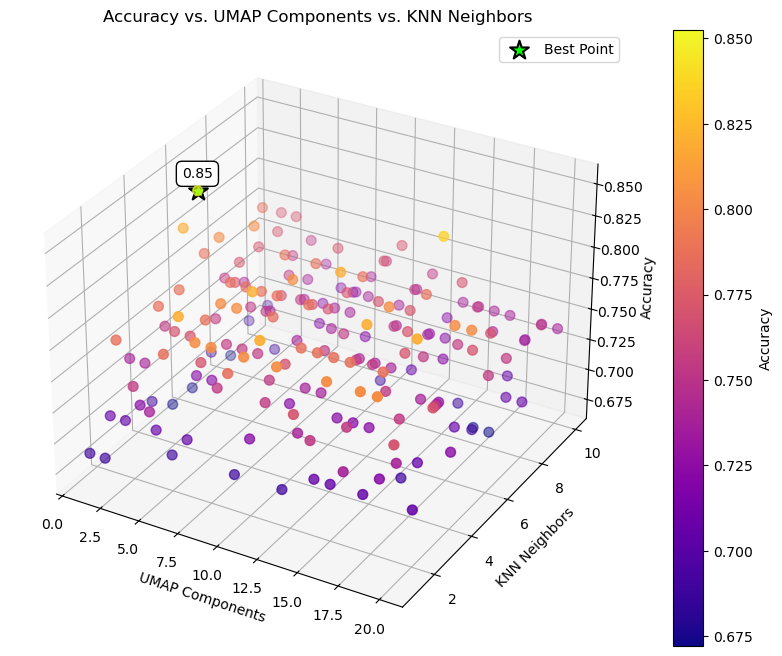

In [9]:
# Scale the data
scaler = StandardScaler()
X = bc.iloc[:, 1:]
y = bc['type']
X_scaled = scaler.fit_transform(X)

# Parameter ranges
umap_components_range = range(1, 21)
knn_neighbors_range = range(1, 11)

results = []

# Grid search over UMAP components and KNN neighbors
for n_components in umap_components_range:
    reducer = umap.UMAP(n_components=n_components, random_state=42)
    X_umap = reducer.fit_transform(X_scaled)

    for n_neighbors in knn_neighbors_range:
        X1, X2, y1, y2 = train_test_split(X_umap, y, test_size=0.4, random_state=42)
        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        model.fit(X1, y1)
        y2_pred = model.predict(X2)
        score = accuracy_score(y2, y2_pred)
        results.append((n_components, n_neighbors, score))

# Convert to array for plotting
results_array = np.array(results)
X_plot = results_array[:, 0]
Y_plot = results_array[:, 1]
Z_plot = results_array[:, 2]

# Get the best point (max accuracy)
best_components, best_neighbors, best_accuracy = max(results, key=lambda x: x[2])
print(f"Best Accuracy: {best_accuracy:.4f} with {best_components} UMAP components and {best_neighbors} KNN neighbors")

# 3D Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_plot, Y_plot, Z_plot, c=Z_plot, cmap='plasma', s=50)

# Highlight best point
ax.scatter(
    best_components, best_neighbors, best_accuracy,
    color='lime', s=200, marker='*', edgecolor='black', linewidth=1.5, label='Best Point'
)

# Add annotation
ax.text(
    best_components, best_neighbors, best_accuracy + 0.01,
    f"{best_accuracy:.2f}", color='black', ha='center',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4')
)

# Axes and labels
ax.set_title("Accuracy vs. UMAP Components vs. KNN Neighbors")
ax.set_xlabel("UMAP Components")
ax.set_ylabel("KNN Neighbors")
ax.set_zlabel("Accuracy")
ax.legend()
fig.colorbar(sc, label='Accuracy')

plt.show()

✅ Best Accuracy: 0.9016 with 10 PCA components and 10 KNN neighbors


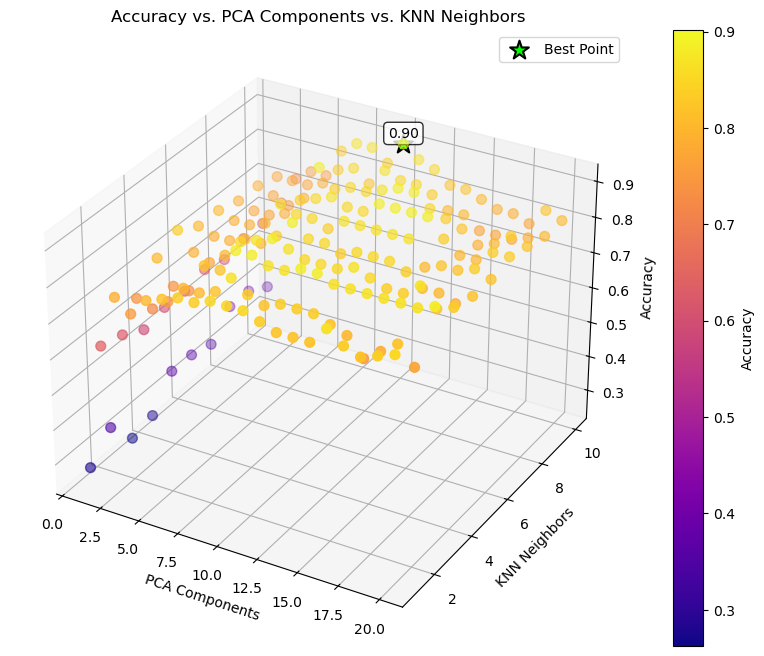

In [29]:
# Scale the data
scaler = StandardScaler()
X = bc.iloc[:, 1:]
y = bc['type']
X_scaled = scaler.fit_transform(X)

# Parameter ranges
pca_components_range = range(1, 21)
knn_neighbors_range = range(1, 11)

# Store results
results = []

# Grid search over PCA components and KNN neighbors
for n_components in pca_components_range:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    for n_neighbors in knn_neighbors_range:
        X1, X2, y1, y2 = train_test_split(X_pca, y, test_size=0.4, random_state=42)
        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        model.fit(X1, y1)
        y2_pred = model.predict(X2)
        score = accuracy_score(y2, y2_pred)
        results.append((n_components, n_neighbors, score))

# Convert to array for plotting
results_array = np.array(results)
X_plot = results_array[:, 0]
Y_plot = results_array[:, 1]
Z_plot = results_array[:, 2]

# Get the best point (max accuracy)
best_components, best_neighbors, best_accuracy = max(results, key=lambda x: x[2])
print(f"Best Accuracy: {best_accuracy:.4f} with {best_components} PCA components and {best_neighbors} KNN neighbors")

# 3D Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_plot, Y_plot, Z_plot, c=Z_plot, cmap='plasma', s=50)

# Highlight best point
ax.scatter(
    best_components, best_neighbors, best_accuracy,
    color='lime', s=200, marker='*', edgecolor='black', linewidth=1.5, label='Best Point'
)

# Add annotation
ax.text(
    best_components, best_neighbors, best_accuracy + 0.01,
    f"{best_accuracy:.2f}", color='black', ha='center', va='bottom',
    bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3')
)

,
# Axes and labels
ax.set_title("Accuracy vs. PCA Components vs. KNN Neighbors")
ax.set_xlabel("PCA Components")
ax.set_ylabel("KNN Neighbors")
ax.set_zlabel("Accuracy")
ax.legend()
fig.colorbar(sc, label='Accuracy')

plt.show()

In [12]:
# Scale data for best model to make classification report and confusion matrix
scaler = StandardScaler()
X = bc.iloc[:, 1:]
y = bc['type']
X_scaled = scaler.fit_transform(X)  # where X is your features (no labels!)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))

[0.1118076  0.10185951 0.05222938 0.03383956 0.03293161 0.02855846
 0.02210805 0.01850792 0.01529895 0.01287753]
Total Variance Explained: 0.4300185648008873


In [30]:
# Best model
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

X1, X2, y1, y2 = train_test_split(X_pca, y, test_size=0.4, random_state=42)
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X1, y1)
y2_pred = model.predict(X2)

In [33]:
# Classification Report
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X1, y1)
y2_model = model.predict(X2)
print(classification_report(y2, y2_pred))
knn_acc = accuracy_score(y2, y2_pred)

              precision    recall  f1-score   support

           1       0.94      0.85      0.89        20
           2       0.80      0.92      0.86        13
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         1
           5       0.73      1.00      0.84         8
           6       1.00      0.77      0.87        13

    accuracy                           0.89        61
   macro avg       0.91      0.92      0.91        61
weighted avg       0.90      0.89      0.89        61



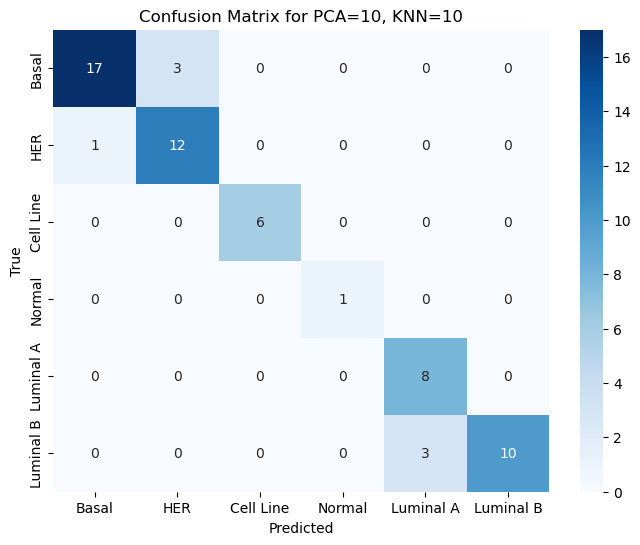

In [34]:
# Confusion matrix
cm = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Basal', 'HER', 'Cell Line', 'Normal', 'Luminal A', 'Luminal B'], yticklabels=['Basal', 'HER', 'Cell Line', 'Normal', 'Luminal A', 'Luminal B'])
plt.title("Confusion Matrix for PCA=10, KNN=10")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [39]:
import xgboost as xgb

In [58]:
#XGBoost needs numbers to be 0 1 2 3 4 5
y_fixed = y - 1
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_fixed, test_size=0.3, random_state=42)

model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.4f}")

C:\Users\jesly\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:02:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8696


C:\Users\jesly\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\jesly\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\jesly\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\jesly\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\jesly\anaconda3\Lib\site-packages\umap\umap_.py:195

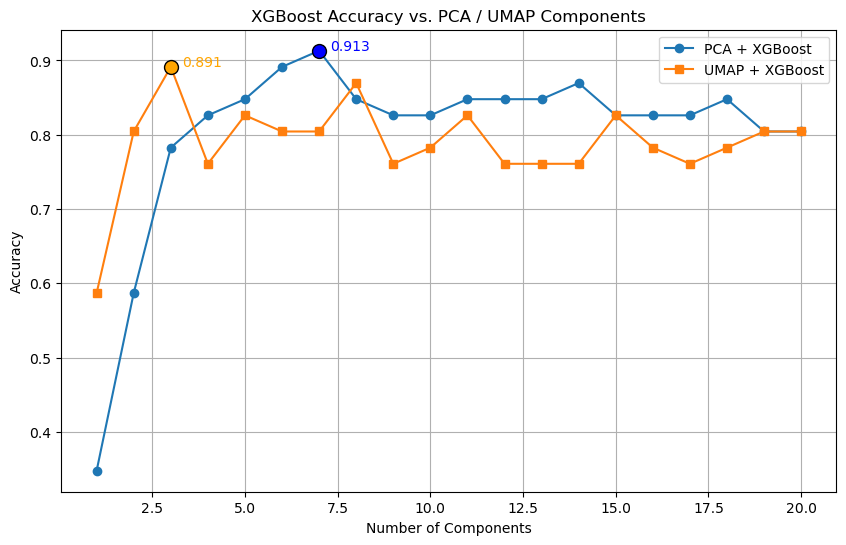

In [49]:
# Test PCA and UMAP with XGBoost
pca_scores = []
umap_scores = []
components_range = range(1, 21)

for n in components_range:
    # PCA
    X_pca = PCA(n_components=n).fit_transform(X_scaled)
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y_fixed, test_size=0.3, random_state=42)
    model_pca = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    model_pca.fit(X_train_pca, y_train)
    acc_pca = accuracy_score(y_test, model_pca.predict(X_test_pca))
    pca_scores.append(acc_pca)

    # UMAP
    X_umap = umap.UMAP(n_components=n, random_state=42).fit_transform(X_scaled)
    X_train_umap, X_test_umap, _, _ = train_test_split(X_umap, y_fixed, test_size=0.3, random_state=42)
    model_umap = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    model_umap.fit(X_train_umap, y_train)
    acc_umap = accuracy_score(y_test, model_umap.predict(X_test_umap))
    umap_scores.append(acc_umap)

# Convert to numpy for indexing
pca_scores = np.array(pca_scores)
umap_scores = np.array(umap_scores)

# Get best indices
best_pca_idx = np.argmax(pca_scores)
best_umap_idx = np.argmax(umap_scores)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(components_range, pca_scores, label='PCA + XGBoost', marker='o')
plt.plot(components_range, umap_scores, label='UMAP + XGBoost', marker='s')

# Highlight best points
pca_best_x = components_range[best_pca_idx]
umap_best_x = components_range[best_umap_idx]

plt.scatter(pca_best_x, pca_scores[best_pca_idx], color='blue', s=100, edgecolor='black', zorder=5)
plt.scatter(umap_best_x, umap_scores[best_umap_idx], color='orange', s=100, edgecolor='black', zorder=5)

# Annotate accuracy values
plt.text(pca_best_x + 0.3, pca_scores[best_pca_idx], f"{pca_scores[best_pca_idx]:.3f}", color='blue', fontsize=10)
plt.text(umap_best_x + 0.3, umap_scores[best_umap_idx], f"{umap_scores[best_umap_idx]:.3f}", color='orange', fontsize=10)

plt.xlabel("Number of Components")
plt.ylabel("Accuracy")
plt.title("XGBoost Accuracy vs. PCA / UMAP Components")
plt.legend()
plt.grid(True)
plt.show()

In [51]:
# Apply PCA with 7 components (best model)
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_fixed, test_size=0.3, random_state=42)

# Train XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.88      0.88      0.88         8
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       0.67      1.00      0.80         4
           5       1.00      0.82      0.90        11

    accuracy                           0.91        46
   macro avg       0.91      0.94      0.92        46
weighted avg       0.93      0.91      0.92        46



C:\Users\jesly\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:15:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


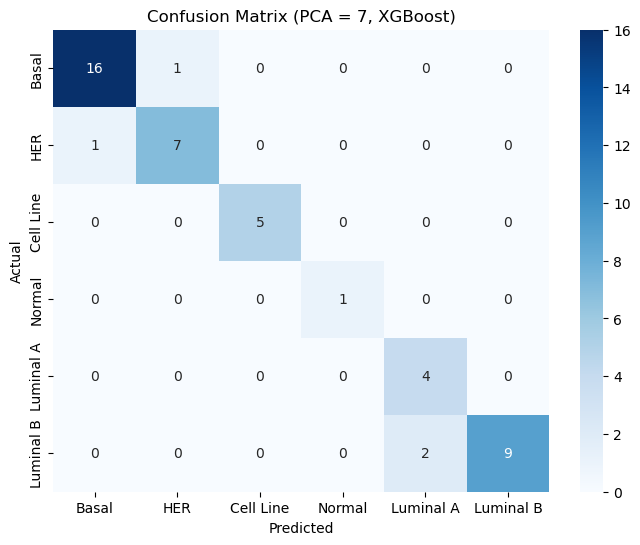

In [54]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Basal', 'HER', 'Cell Line', 'Normal', 'Luminal A', 'Luminal B'], yticklabels=['Basal', 'HER', 'Cell Line', 'Normal', 'Luminal A', 'Luminal B'])
plt.title("Confusion Matrix (PCA = 7, XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()